In [1]:
! pip install plotly==5.3.1
! pip install numpy
! pip install pandas
! pip install pathlib
! pip install wget
! pip install scikit-learn

In [2]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from pathlib import Path
import wget
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
url = 'https://raw.githubusercontent.com/lavaman131/Linear-Regression-Tutorial/main/real_estate_costs.csv'

if not Path('real_estate_costs.csv').is_file():
    filename = wget.download(url)

In [4]:
# load dataset
realEstate_prices = pd.read_csv(Path('real_estate_costs.csv'))

x = 'X2 house age' # explanatory variable
y = 'Y house price of unit area' # response variable

realEstate_prices = realEstate_prices[[x, y]]

realEstate_prices.head()

X2 house age  Y house price of unit area
0          32.0                        37.9
1          19.5                        42.2
2          13.3                        47.3
3          13.3                        54.8
4           5.0                        43.1

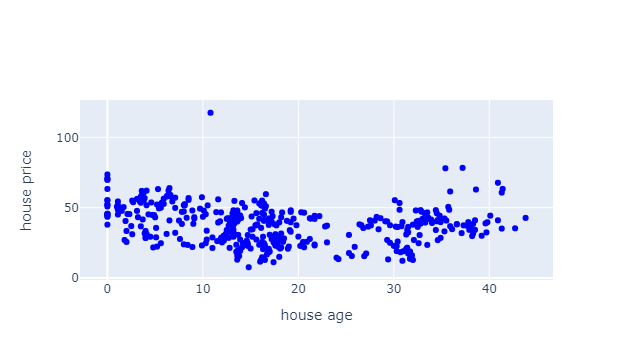

In [5]:
# create plot figure
fig = go.Figure()

# plot scatterplot of data
fig.add_trace(go.Scatter(x=realEstate_prices[x], y=realEstate_prices[y], mode='markers', marker=dict(color='blue'), name='data'))

fig.update_layout(
    xaxis_title="house age",
    yaxis_title="house price"
)

In [6]:
r = np.corrcoef([realEstate_prices[x]], realEstate_prices[y])[0,1]
print(f'r: {r}')

r: -0.21056704627721692


In [7]:
# A matrix 
X = np.array(realEstate_prices['X2 house age']).reshape(-1,1)
X = np.hstack([np.ones(X.shape), X])

# b vector
y = np.array(realEstate_prices['Y house price of unit area'])

# split data into 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
# create linear regression model
reg = LinearRegression()

# fit model using linear algebra
reg.fit(X_train, y_train)

# get accuracy of model (r^2)
reg.score(X_test, y_test)

0.0809438039240935

In [9]:
y_pred = reg.predict(X_test)

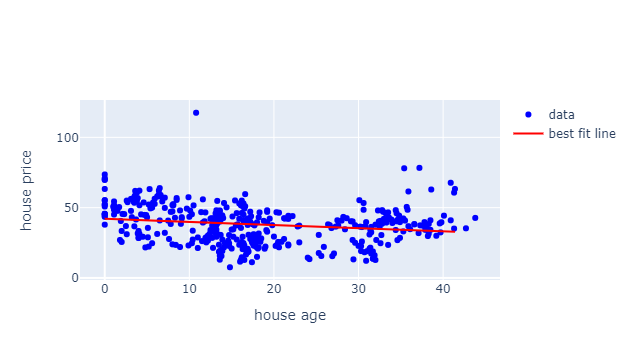

In [10]:
fig.add_trace(go.Scatter(x=X_test[:, 1], y=y_pred, line_shape='linear', marker=dict(color='red'), name='best fit line'))

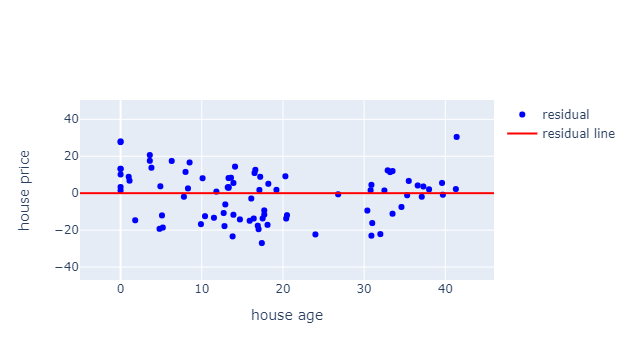

In [11]:
# calculate residual
residual = y_test - y_pred

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=X_test[:, 1], y=residual, mode='markers', 
                          marker=dict(color='blue'), name='residual'))
fig2.add_trace(go.Scatter(x=np.arange(X_test[:, 1].min()-5, X_test[:, 1].max()+5), 
                          y=np.zeros(X_test[:, 1].shape), line_shape='linear', 
                          marker=dict(color='red'), name='residual line'))
fig2.update_layout(yaxis_range=[residual.min()-20,residual.max()+20], 
                   xaxis_title="house age", yaxis_title="house price")